# Building a USD Libor Dual Curve and Valuing a Swap

We build an OIS curve from OIS swaps that include forward starting OIS using MM dates.

This follows example mentioned in the blogpost at https://blog.deriscope.com/index.php/en/excel-ois-discounted-usd-libor-curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *

####################################################################
#  FINANCEPY BETA Version 0.350 - This build: 30 Apr 2024 at 21:20 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [3]:
value_dt = Date(22, 5, 2019)

In [4]:
interp_type = InterpTypes.LINEAR_ZERO_RATES

In [5]:
value_dt.next_imm_date()

19-JUN-2019

## Building USD Single Curve

In [6]:
# Need to specify a UK calendar (trade was done in London)
cal = CalendarTypes.UNITED_KINGDOM

depoDCCType = DayCountTypes.ACT_360
depos = []
spot_days = 2
settle_dt = value_dt.add_weekdays(spot_days)
depo = IborDeposit(settle_dt, "3M", 2.523380000/100.0, depoDCCType, cal_type=cal); depos.append(depo)

fraDCCType = DayCountTypes.ACT_360

f1 = value_dt.next_imm_date()
f2 = f1.next_imm_date()
f3 = f2.next_imm_date()
f4 = f3.next_imm_date()
f5 = f4.next_imm_date()
f6 = f5.next_imm_date()
f7 = f6.next_imm_date()

fras = []
fra = IborFRA(f1, f2, 2.524910280/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(f2, f3, 2.434411307/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(f3, f4, 2.373650291/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(f4, f5, 2.237622952/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(f5, f6, 2.136343383/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(f6, f7, 2.074814539/100.0, fraDCCType, cal_type=cal); fras.append(fra)

swaps = []
swap_type = SwapTypes.PAY
fixed_dcc_type = DayCountTypes.THIRTY_E_360_ISDA
fixed_freq_type = FrequencyTypes.SEMI_ANNUAL

swap = IborSwap(settle_dt, "2Y", swap_type, 2.289249897/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "3Y", swap_type, 2.218399525/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "4Y", swap_type, 2.200400352/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "5Y", swap_type, 2.209749699/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "6Y", swap_type, 2.233999729/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "7Y", swap_type, 2.262149811/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "8Y", swap_type, 2.293599606/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "9Y", swap_type, 2.326499939/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "10Y", swap_type, 2.358519554/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "11Y", swap_type, 2.388500214/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "12Y", swap_type, 2.416099548/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "15Y", swap_type, 2.475949764/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "20Y", swap_type, 2.528799534/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "25Y", swap_type, 2.545499325/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "30Y", swap_type, 2.551049709/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "40Y", swap_type, 2.534699440/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "50Y", swap_type, 2.504999638/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)

iborDepos = depos.copy()
iborFras = fras.copy()
ibor_swaps = swaps.copy()

In [7]:
iborSingleCurve = IborSingleCurve(value_dt, iborDepos, iborFras, ibor_swaps, interp_type)

In [8]:
for depo in iborDepos:
    dt = depo.maturity_dt
    df = iborSingleCurve.df(dt) / iborSingleCurve.df(settle_dt)
    ccZeroRate = iborSingleCurve.zero_rate(dt, FrequencyTypes.CONTINUOUS, DayCountTypes.ACT_360)
    print("%12s %12.9f %9.6f"% (dt, df, ccZeroRate*100))

for fra in iborFras:
    dt = fra.maturity_dt
    df = iborSingleCurve.df(dt) / iborSingleCurve.df(settle_dt)
    ccZeroRate = iborSingleCurve.zero_rate(dt, FrequencyTypes.CONTINUOUS, DayCountTypes.ACT_360)
    print("%12s %12.9f %9.6f"% (dt, df, ccZeroRate*100))
    
for swap in ibor_swaps:
    dt = swap.maturity_dt
    df = iborSingleCurve.df(dt) / iborSingleCurve.df(settle_dt)
    ccZeroRate = iborSingleCurve.zero_rate(dt, FrequencyTypes.CONTINUOUS, DayCountTypes.ACT_360)
    print("%12s %12.9f %9.6f"% (dt, df, ccZeroRate*100))

 24-MAY-2019  1.000000000  2.523203
 27-AUG-2019  0.993385128  2.515184
 18-SEP-2019  0.991850650  2.517857
 18-DEC-2019  0.985784477  2.478465
 18-MAR-2020  0.979904988  2.444632
 17-JUN-2020  0.974393609  2.395113
 16-SEP-2020  0.969159950  2.345276
 16-DEC-2020  0.964103545  2.301539
 24-MAY-2021  0.955542496  2.240360
 24-MAY-2022  0.936048294  2.171422
 24-MAY-2023  0.916298196  2.154429
 24-MAY-2024  0.896031642  2.163538
 27-MAY-2025  0.875061663  2.189185
 26-MAY-2026  0.854102723  2.218814
 24-MAY-2027  0.832956198  2.252024
 24-MAY-2028  0.811555530  2.286302
 24-MAY-2029  0.790199941  2.320640
 24-MAY-2030  0.769039330  2.353015
 27-MAY-2031  0.748020257  2.383034
 24-MAY-2034  0.688939508  2.448223
 24-MAY-2039  0.601370459  2.506177
 24-MAY-2044  0.527467921  2.521685
 24-MAY-2049  0.463717643  2.524663
 27-MAY-2059  0.363449405  2.493410
 24-MAY-2069  0.290012735  2.440019


## Building the Discounting OIS Curve

We construct the OIS curve from a series of swaps, some forward starting. The default assumption on the floating leg is annual payments.

In [9]:
cal = CalendarTypes.UNITED_KINGDOM

depoDCCType = DayCountTypes.ACT_360
depos = []

spot_days = 2
settle_dt = value_dt.add_weekdays(spot_days)
depo = IborDeposit(settle_dt, "1D", 2.390000/100.0, depoDCCType, cal_type = cal); depos.append(depo)

fras = []

swaps = []
swap_type = SwapTypes.PAY
spot_days = 2
settle_dt = value_dt.add_weekdays(spot_days)
fixed_dcc_type = DayCountTypes.ACT_360
fixed_freq_type = FrequencyTypes.ANNUAL

# Standard OIS with standard annual terms
swap = OIS(settle_dt, "1W", swap_type, 2.38829947/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "2W", swap_type, 2.38419962/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "3W", swap_type, 2.39200020/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "1M", swap_type, 2.38549948/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "2M", swap_type, 2.38499975/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "3M", swap_type, 2.37699986/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "4M", swap_type, 2.36999989/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "5M", swap_type, 2.35499954/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "6M", swap_type, 2.33832979/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "9M", swap_type, 2.2810001373/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "12M", swap_type, 2.2280001640/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "18M", swap_type, 2.1263647078/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "2Y", swap_type, 2.0547046661/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "3Y", swap_type, 1.9829993844/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "4Y", swap_type, 1.9649996758/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "5Y", swap_type, 1.9729995728/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "7Y", swap_type, 2.0252024253/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "10Y", swap_type, 2.1155184592/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "12Y", swap_type, 2.1703001490/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "15Y", swap_type, 2.2254047478/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "20Y", swap_type, 2.2718827283/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "25Y", swap_type, 2.2859679587/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "30Y", swap_type, 2.2865169760/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "40Y", swap_type, 2.2714174506/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)
swap = OIS(settle_dt, "50Y", swap_type, 2.2406175848/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal); swaps.append(swap)

oisDepos = depos.copy()
oisFras = fras.copy()
oisSwaps = swaps.copy()

In [10]:
oisCurve = OISCurve(value_dt, oisDepos, oisFras, oisSwaps, interp_type)

Inserting synthetic deposit


In [11]:
for swap in oisSwaps:
    dt = swap.maturity_dt
    df = oisCurve.df(dt) / oisCurve.df(settle_dt)
    ccZeroRate = oisCurve.zero_rate(dt, FrequencyTypes.CONTINUOUS, DayCountTypes.ACT_365F)
    print("%12s %12.9f %9.6f"% (dt, df, ccZeroRate*100))

 31-MAY-2019  0.999535824  2.421381
 07-JUN-2019  0.999073670  2.417049
 14-JUN-2019  0.998606611  2.423489
 24-JUN-2019  0.997950031  2.416568
 24-JUL-2019  0.995975016  2.413562
 27-AUG-2019  0.993766462  2.402910
 24-SEP-2019  0.991967543  2.393717
 24-OCT-2019  0.990090434  2.376447
 25-NOV-2019  0.988126263  2.357385
 24-FEB-2020  0.982812895  2.293629
 26-MAY-2020  0.977732042  2.234629
 24-NOV-2020  0.968326468  2.137019
 24-MAY-2021  0.959583156  2.060984
 24-MAY-2022  0.942053259  1.988759
 24-MAY-2023  0.924167141  1.970828
 24-MAY-2024  0.905691303  1.979452
 26-MAY-2026  0.867091521  2.034416
 24-MAY-2029  0.807952630  2.130927
 27-MAY-2031  0.768581453  2.190512
 24-MAY-2034  0.713274064  2.251015
 24-MAY-2039  0.630852477  2.301873
 24-MAY-2044  0.560354426  2.314991
 24-MAY-2049  0.499558084  2.311769
 27-MAY-2059  0.400664352  2.284563
 24-MAY-2069  0.327288853  2.232255


## Building the Dual Curve

In [12]:
iborDualCurve = IborDualCurve(value_dt, oisCurve, iborDepos, iborFras, ibor_swaps, interp_type)

In [13]:
for swap in ibor_swaps:
    dt = swap.maturity_dt
    df = iborDualCurve.df(dt) / iborDualCurve.df(settle_dt)
    ccZeroRate = iborDualCurve.zero_rate(dt, FrequencyTypes.CONTINUOUS, DayCountTypes.ACT_365F)
    print("%12s %12.9f %9.6f"% (dt, df, ccZeroRate*100))

 24-MAY-2021  0.955525521  2.272361
 24-MAY-2022  0.936021618  2.202528
 24-MAY-2023  0.916264434  2.185271
 24-MAY-2024  0.895995070  2.194401
 27-MAY-2025  0.875027906  2.220231
 26-MAY-2026  0.854075778  2.250081
 24-MAY-2027  0.832941868  2.283517
 24-MAY-2028  0.811559400  2.318004
 24-MAY-2029  0.790226901  2.352531
 24-MAY-2030  0.769093238  2.385059
 27-MAY-2031  0.748104482  2.415195
 24-MAY-2034  0.689109517  2.480583
 24-MAY-2039  0.601651411  2.538652
 24-MAY-2044  0.527773265  2.554395
 24-MAY-2049  0.464004061  2.557671
 27-MAY-2059  0.363479526  2.527834
 24-MAY-2069  0.289566671  2.476984


## Single vs Dual Curve

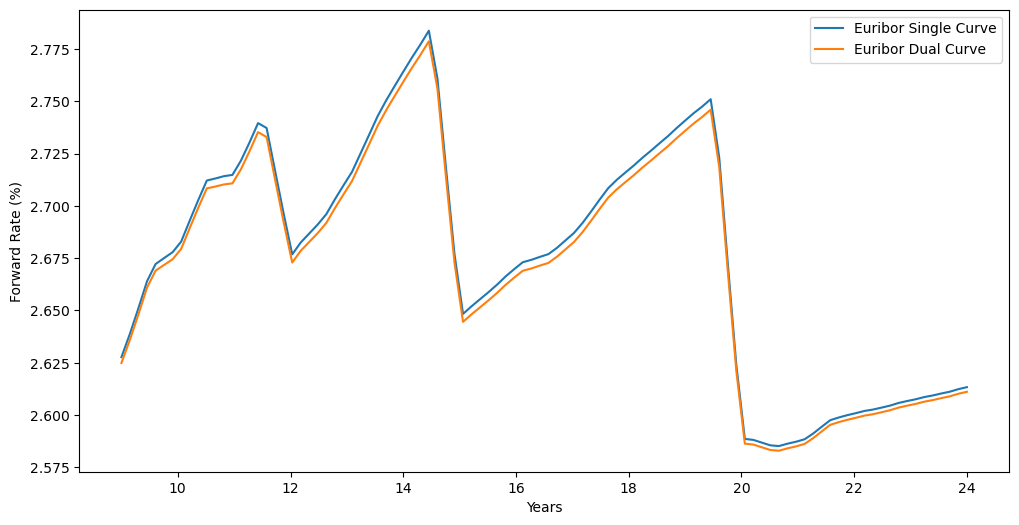

In [14]:
years = np.linspace(9, 24, 100)
dates = settle_dt.add_years(years)

iborSingleCurveFwds = iborSingleCurve.fwd_rate(dates, "6M")    
iborDualCurveFwds = iborDualCurve.fwd_rate(dates, "6M")

plt.figure(figsize=(12,6))
plt.plot(years, iborSingleCurveFwds*100.0, label="Euribor Single Curve")
plt.plot(years, iborDualCurveFwds*100.0, label="Euribor Dual Curve")
plt.xlabel("Years")
plt.ylabel("Forward Rate (%)")
plt.legend();

I calculate the difference between the two curves.

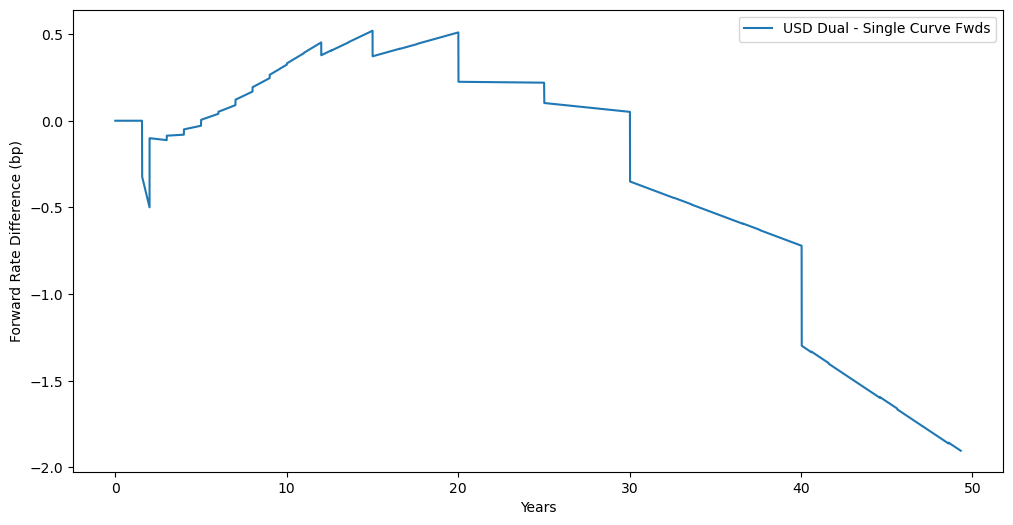

In [15]:
dayMax = 50*360
years = np.linspace(1/365, dayMax/365, dayMax)
dates = settle_dt.add_years(years)

liborSingleCurveFwds = iborSingleCurve.fwd(dates)    
liborDualCurveFwds = iborDualCurve.fwd(dates)

diff = liborSingleCurveFwds - liborDualCurveFwds

plt.figure(figsize=(12,6))
plt.plot(years, diff*10000.0, label="USD Dual - Single Curve Fwds")
plt.xlabel("Years")
plt.ylabel("Forward Rate Difference (bp)")
plt.legend();

Copyright (c) Dominic O'Kane 2020